In [12]:
import argparse
import subprocess, os
from process_data import *
import random
import numpy as np
import torch
from data.dataset import create_datasets
from Generator.Generator import generator
import yaml
import matplotlib.pyplot as plt

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
stream=open("Configs/SST-2/VAEAnneal.yaml", "r")
argsdict=yaml.safe_load(stream)
if argsdict['computer'] == 'home':
    argsdict['path'] = "/media/frederic/VAETI"
elif argsdict['computer'] == 'labo':
    argsdict['path'] = "/u/piedboef/Documents/VAETI"

if argsdict['dataset'] == "SST2":
    categories = ["neg", "pos"]
elif argsdict['dataset'] == "TREC6":
    categories = ["ABBR", "DESC", "ENTY", "HUM", "LOC", "NUM"]
elif argsdict['dataset'] == "FakeNews":
    categories = ["Fake", "Real"]
elif argsdict['dataset'] == "QNLI":
    categories = ["entailment", "not_entailment"]
elif argsdict['dataset'] == "Irony":
    categories = ["NotIro", "Iro"]
elif argsdict['dataset'] == "IronyB":
    categories = ["Clash", "Situational", "Other", "NotIro"]
elif argsdict['dataset'] == 'MNIST':
    categories = [0,1,2,3,4,5,6,7,8,9]
else:
    raise ValueError("Dataset not found")
argsdict['categories'] = categories

argdict=argsdict
    

In [5]:
train, dev, test=create_datasets(argdict)
Gen = generator(argdict, train, dev, test)
Gen.train()

Think about why there aint no embedding dropout on encoder?
Think about why there aint no embedding dropout on encoder?
VAE_model(
  (encoder): encoder(
    (model): GRU_Encoder(
      (embedding): Embedding(14716, 300)
      (rnn): GRU(300, 1024, batch_first=True)
      (hidden2mean): Linear(in_features=1024, out_features=5, bias=True)
      (hidden2logv): Linear(in_features=1024, out_features=5, bias=True)
    )
  )
  (decoder): decoder(
    (model): GRU_Decoder(
      (latent2hidden): Linear(in_features=5, out_features=1024, bias=True)
      (embedding): Embedding(14716, 300)
      (rnn): GRU(300, 1024, batch_first=True)
      (outputs2vocab): Linear(in_features=1024, out_features=14716, bias=True)
    )
  )
)
TRAIN Epoch 0/30, Mean ELBO 138.54209206957336, Mean LF 138.31178283691406, Mean KL div 0.23030203580856323
DEV Epoch 0/30, Mean ELBO 130.362245287214, Mean LF 130.28440856933594, Mean KL div 0.07783125340938568
TRAIN Epoch 1/30, Mean ELBO 122.82824966010698, Mean LF 122.76991

/u/piedboef/Documents/VAETI/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/u/piedboef/Documents/VAETI/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


              x          y  labs  \
0     53.122715  30.282709   1.0   
1      4.151909 -24.614895   0.0   
2     34.894176 -37.138016   0.0   
3     11.579072 -11.166628   1.0   
4     21.776428  -0.447255   1.0   
...         ...        ...   ...   
6915 -14.271746 -29.106808   1.0   
6916  40.455143   7.429922   0.0   
6917 -34.420338  51.528374   0.0   
6918  28.128973  28.425959   0.0   
6919  60.161167  21.232077   1.0   

                                                 points  
0     [0.7487602233886719, -1.692699670791626, 1.081...  
1     [-0.33825212717056274, 1.592329502105713, 0.17...  
2     [1.5273380279541016, -0.8326377272605896, 1.36...  
3     [-1.5710830688476562, 1.4663708209991455, 0.27...  
4     [-0.9727094173431396, 0.11625269800424576, 0.6...  
...                                                 ...  
6915  [0.7181347012519836, 0.7679778337478638, -0.15...  
6916  [0.18396636843681335, 0.34875842928886414, -0....  
6917  [0.3488761782646179, -0.734779059886932

NameError: name 'sdffd' is not defined

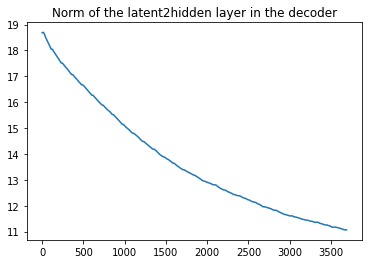

In [14]:
y=Gen.generator.model.decoder.norm
x=np.arange(len(y))

plt.plot(x,y)
plt.title("Norm of the latent2hidden layer in the decoder")
plt.show()